# **Main Transform**

In [9]:
# transform = Compose([
#     Resize((64,128)),
#     RandomHorizontalFlip(),
#     ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
#     RandomRotation(10),
#     RandomVerticalFlip(),
#     ToTensor(),
# ])

# **Apply to test**

In [10]:
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import RandomResizedCrop, RandomHorizontalFlip, ColorJitter, RandomRotation, RandomVerticalFlip, ToTensor, Normalize, Compose, Resize
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

train_folder_path = 'C:/Users/FPTSHOP/OneDrive/Documents/SoICT_Hackathon_2023/Handwritten_OCR/data/new_train'
test_folder_path = 'C:/Users/FPTSHOP/OneDrive/Documents/SoICT_Hackathon_2023/Handwritten_OCR/data/new_public_test'
label_file_path = 'C:/Users/FPTSHOP/OneDrive/Documents/SoICT_Hackathon_2023/Handwritten_OCR/train_gt.txt'
root = 'C:/Users/FPTSHOP/OneDrive/Documents/SoICT_Hackathon_2023/Handwritten_OCR/data'

def encode_to_num(text, char_list):
    encoded_label = []
    for char in text:
        encoded_label.append(char_list.index(char) + 1)
    return encoded_label

class OCRDataset(Dataset):
    def __init__(self, root, train=True, transform=None):
        self.train = train
        self.transform = transform
        if train:
            dir = os.path.join(root, train_folder_path)
            paths = os.listdir(dir)
            image_files = [os.path.join(dir, path) for path in paths]
            label_file = label_file_path
        else:
            dir = os.path.join(root, test_folder_path)
            paths = os.listdir(dir)
            image_files = [os.path.join(dir, path) for path in paths]

        self.images_path = image_files
        if train:
            self.labels = []
            with open(label_file, encoding='utf-8') as f:
                self.labels = [line.split()[1] for line in f.readlines()]
            char_list = set()
            for label in self.labels:
                char_list.update(set(label))
            self.char_list = sorted(char_list)
            for i in range(len(self.labels)):
                self.labels[i] = encode_to_num(self.labels[i], self.char_list)

    def __len__(self):
        return len(self.images_path)

    def __getitem__(self, idx):
        image_path = self.images_path[idx]
        image = Image.open(image_path).convert('L')
        
        if self.transform:
            original_image = image.copy()  # Make a copy of the original image
            image = self.transform(image)  # Apply the specified transformations
            
            # Display the original and transformed images
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(np.array(original_image), cmap='gray')
            plt.title("Original Image")
            
            plt.subplot(1, 2, 2)
            plt.imshow(np.array(image.permute(1, 2, 0)), cmap='gray')
            plt.title("Transformed Image")
            plt.show()
        
        if self.train:
            label = self.labels[idx]
            max_seq_len = 32
            padded_label = np.squeeze(pad_sequences([label], maxlen=max_seq_len, padding='post', value=0))
            return image, padded_label, len(label)
        else:
            return image

if __name__ == '__main__':
    transform = Compose([
        Resize((64,128)),
        RandomHorizontalFlip(),
        ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        RandomRotation(10),
        RandomVerticalFlip(),
        ToTensor(),
    ])

    train_dataloader = DataLoader(
        dataset=OCRDataset(root=train_folder_path, train=True, transform=transform),
        batch_size=8,
        num_workers=4,
        drop_last=True,
        shuffle=True
    )
    test_dataloader = DataLoader(
        dataset=OCRDataset(root=test_folder_path, train=False, transform=transform),
        batch_size=8,
        num_workers=4,
        drop_last=True,
        shuffle=True
    )    


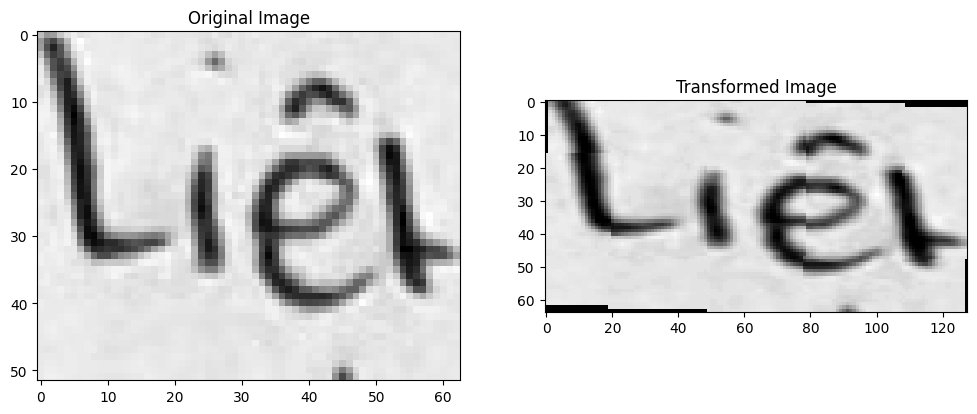

In [11]:
ocr = OCRDataset(root=train_folder_path, train=True, transform=transform)

# Choose an index to view a specific image (e.g., index 0 for the first image)

index = 5 # change the index for another image
image, _, _ = ocr.__getitem__(index)

# Convert the tensor image to a NumPy array for displaying
image_np = image.permute(1, 2, 0).numpy()

